# Covid-19 infección en Ecuador. Modelos matemáticos y predicciones
## Formulación del Problema
Se desea aser una comparación de modelos, lineal, polilnomico ,aplicados a la infección por el virus Covid-19

Se realizara un análisis matemático simple del crecimiento de la infección en Python y dos modelos para comprender mejor la evolución de la infección.

Se creara  modelos de series temporales del número total de personas infectadas hasta la fecha y las personas curadas. Estos modelos tienen parámetros , que se estimarán por ajuste de curva.
## Definición del sistema 



## EL modelo lineal

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza en Machine Learning y en estadística. En su versión más sencilla, lo que haremos es «dibujar una recta» que nos indicará la tendencia de un conjunto de datos continuos.

Recordemos rápidamente la fórmula de la recta:

Y = mX + b

Donde Y es el resultado, X es la variable, m la pendiente (o coeficiente) de la recta y b la constante o también conocida como el «punto de corte con el eje Y» en la gráfica (cuando X=0)
Ejemplo
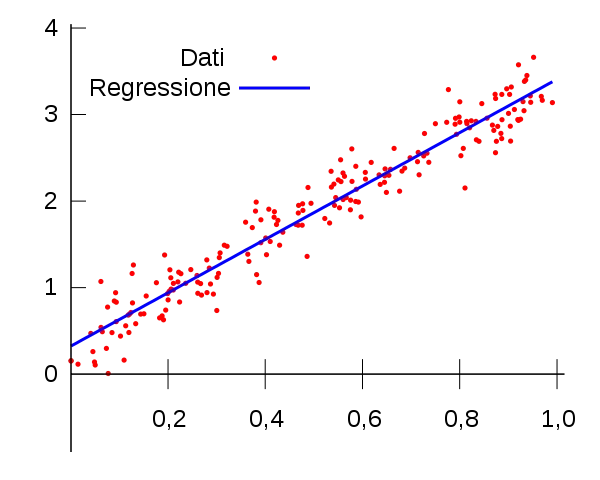

Recordemos que los algoritmos de Machine Learning Supervisados, aprenden por sí mismos y -en este caso- a obtener automáticamente esa «recta» que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor «Y» de salida real.


## El modelo logistico

El modelo logístico se ha utilizado ampliamente para describir el crecimiento de una población. Una infección puede describirse como el crecimiento de la población de un agente patógeno, por lo que un modelo logístico parece razonable .
La expresión más genérica de una función logística es:
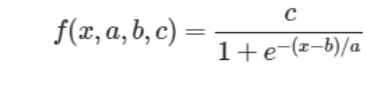

En esta fórmula, tenemos la variable x que es el tiempo y tres parámetros: a, b, c .

- a se refiere a la velocidad de infección
- b es el día en que ocurrieron las infecciones máximas
- c es el número total de personas infectadas registradas al final de la infección
 A continuacion se puede apreciar un ejemplo de regresion logistica
 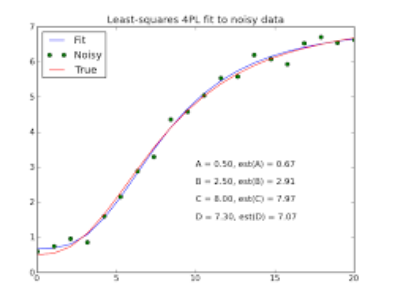
Definamos la función en Python y realicemos elprocedimiento de ajuste de curva utilizado para el crecimiento logístico.
## Modelo exponencial

Mientras que el modelo logístico describe un crecimiento de infección que se detendrá en el futuro, el modelo exponencial describe un crecimiento de infección imparable . Por ejemplo, si un paciente infecta a 2 pacientes por día, después de 1 día tendremos 2 infecciones, 4 después de 2 días, 8 después de 3 y así sucesivamente.
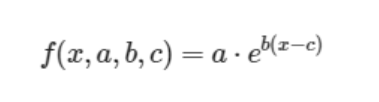
A continuacion se tiene un ejemplo de regresion exponencial
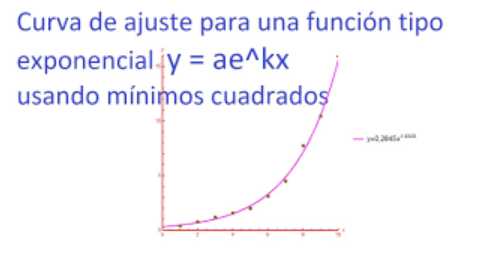
## Modelo polinomial
Predicción de una variable de respuesta cuantitativa a partir de una variable predictora cuantitativa, donde la relación se modela como una función polinomial de orden n (esto significa que pueden tener de diferentes exponenciales o grados y se debe ir probando)  

Se puede tener una ecuacion con diferentes grados

y = a0 + a1x + a2x^2 + a3x^3 + … + anx^n + ε

Ejemplo de una regresion polinomica de grado 4.
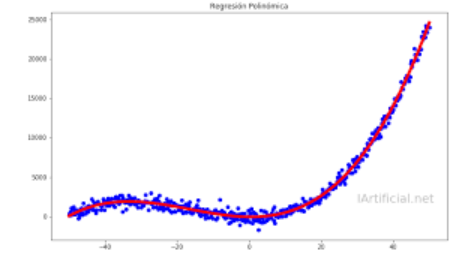

## Formulación del modelo 
Para el desarollo  de este modelo se analisara un conjunto de datos delos cuales se extraera el numero de infectdos y el numero de personas recuperadas con el fin  de analisar el estado dela enfermedadad a nbel nacional 

In [3]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

## Coleccion de dataos

In [5]:
# Descarga de los datos (URL)
url = 'https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/ecuacovid.csv'
df = pd.read_csv(url)
df

,muestras,muestras_pcr,muestras_pcr_nuevas,pruebas_rezagadas,muertes_confirmadas,muertes_probables,muertes,muertes_nuevas,positivas,positivas_pcr,...,defunciones_2017,defunciones_2017_nuevas,defunciones_2016,defunciones_2016_nuevas,defunciones_2015,defunciones_2015_nuevas,hospitalizadas_altas,hospitalizadas_estables,hospitalizadas_pronostico_reservadas,created_at
0,129,129,0,106,1,0,1,0,23,23,...,14506,217,13643,212,12866,167,0,0,1,13/03/2020
1,206,206,77,178,2,0,2,1,28,28,...,14718,212,13848,205,13047,181,0,7,3,14/03/2020
2,273,273,67,236,2,0,2,0,37,37,...,14926,208,14048,200,13228,181,0,7,2,15/03/2020
3,354,354,81,296,2,0,2,0,58,58,...,15164,238,14238,190,13388,160,0,9,5,16/03/2020
4,762,762,408,651,2,0,2,0,111,111,...,15347,183,14412,174,13550,162,0,9,5,17/03/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,579156,558584,1821,50370,8420,4310,12730,26,180739,171783,...,59432,195,57567,186,55310,179,21589,510,338,05/11/2020
238,583731,563159,4575,50582,8449,4312,12761,31,181464,172508,...,59627,195,57776,209,55477,167,21806,505,333,06/11/2020
239,587193,566621,3462,49940,8492,4323,12815,54,182442,173486,...,59780,153,57975,199,55657,180,21857,497,342,07/11/2020
240,593170,572598,5977,49175,8507,4323,12830,15,183863,174907,...,59962,182,58159,184,55811,154,21946,490,343,08/11/2020



## Implementación del modelo 
en esta seccion se prosede a seleccionar y analisar loas datos requeridos para su posteriornalisis
## Datos positivos

In [6]:
df1 = df.loc[:,['created_at','positivas']]
FMT ='%d/%m/%Y'
date = df['created_at']
df1['created_at'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/01/2020", FMT)).days)
df1

,created_at,positivas
0,72,23
1,73,28
2,74,37
3,75,58
4,76,111
...,...,...
237,309,180739
238,310,181464
239,311,182442
240,312,183863


## Datos recuperados

In [7]:
df = df.loc[:,['created_at','hospitalizadas_altas']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%d/%m/%Y'
date = df['created_at']
df['created_at'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/01/2020", FMT)).days)

df

,created_at,hospitalizadas_altas
0,72,0
1,73,0
2,74,0
3,75,0
4,76,0
...,...,...
237,309,21589
238,310,21806
239,311,21857
240,312,21946


## Diseño de experimentos 
para este experimeto se usaran losdetos para la prediccion de el numero de infectados y recuperados en una catidad de n dias para asi poder contatar el abanse de la enfermeda en un periodo de tiempo n 

## comparacion de recuperados frente a infectados

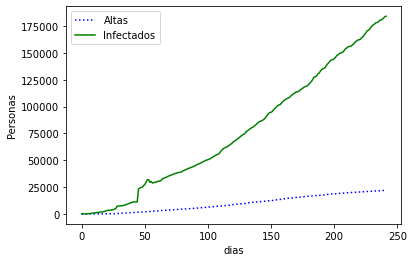

In [8]:
plt.xlabel("dias")   # Inserta el título del eje X
plt.ylabel("Personas")   # Inserta el título del eje Y
plt.plot(df['hospitalizadas_altas'], linestyle=':', color='b', label = "Altas" )  
plt.ion()   # Activa modo interactivo de dibujo
plt.plot(df1['positivas'], linestyle='-', color='g', label = "Infectados")   # Dibuja datos de 
plt.legend(loc="upper left")

## Grafica recuperados

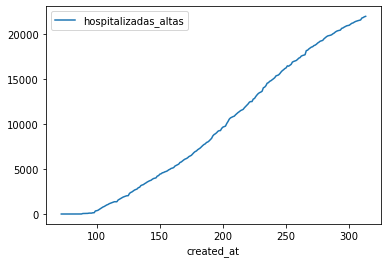

In [9]:
df.plot(x ='created_at', y='hospitalizadas_altas')

## Grafica Infectados

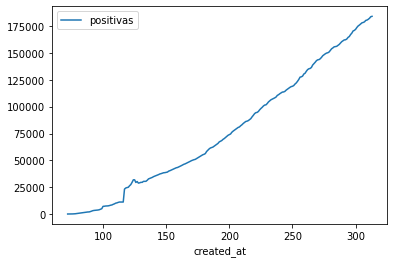

In [10]:
df1.plot(x ='created_at', y='positivas')

## Implementación del modelo y Experimentación
#  modelo lineal

- Calculo de Error medio y el valor que corta en el eje y 
- Calculo  en el caso de los Recuperados

In [11]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [103.96695146]
Independent term: 
 -10358.91914831283


### Calculo en el caso de los Infectados

In [12]:
x1 = list(df1.iloc [:, 0]) # Fecha
y1 = list(df1.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr1 = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr1.fit(np.array(x1).reshape(-1, 1) ,y1)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr1.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr1.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [796.44447323]
Independent term: 
 -76368.47845274486


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»

## Calculo de la prediccion
### Prediccion en el caso de los Recuperados

In [163]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
y_prediccion = regr.predict([[100]])
print(int(y_prediccion))

34


### Prediccion en el caso de los infectados

In [164]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
y_prediccion = regr1.predict([[100]])
print(int(y_prediccion))

3526


## Grafica de los recuperados

[ 70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299]


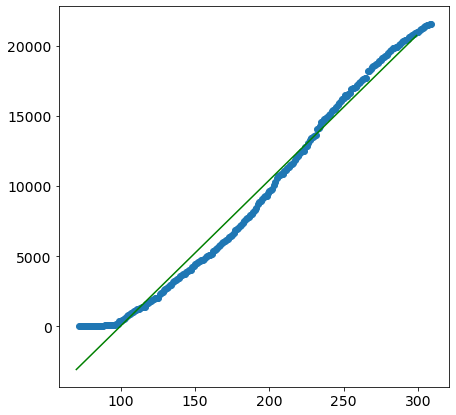

In [165]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(70, 300))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

## Grafica infectados

[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299]


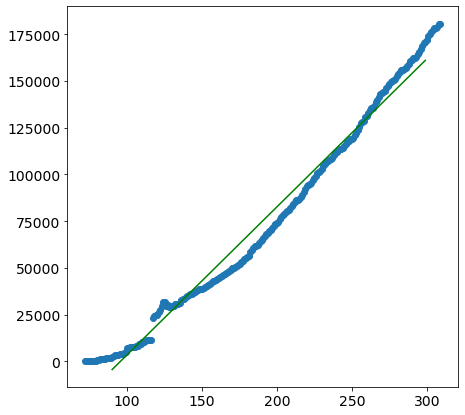

In [167]:
#Graficar
plt.scatter(x1, y1)
x_real1 = np.array(range(90, 300))
print(x_real1)
plt.plot(x_real1, regr1.predict(x_real1.reshape(-1, 1)), color='green')
plt.show()

## Comparacion de las Garaficas

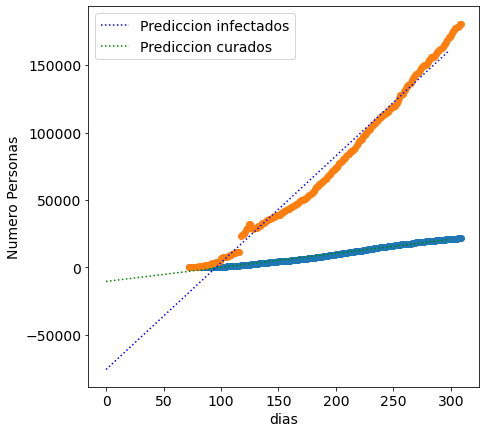

In [177]:
plt.ion()  
plt.xlabel("dias")   # Inserta el título del eje X
plt.ylabel("Numero Personas")   # Inserta el título del eje Y
plt.scatter(x, y)
x_real1 = np.array(range(0, 300))
plt.plot(x_real1, regr1.predict(x_real1.reshape(-1, 1)), linestyle=':', color='b', label = "Prediccion infectados" )  
plt.ion()   # Activa modo interactivo de dibujo
plt.scatter(x1, y1)
x_real = np.array(range(0, 300))
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), linestyle=':', color='g', label = "Prediccion curados")   # Dibuja datos de  
plt.legend(loc="upper left")

# El modelo logistico

In [142]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-79321.80333672,  17153.24987068]), array([[3131803.58157127, -601540.25806826],
       [-601540.25806826,  116236.20967668]]))


In [146]:
def modelo_logistico1(x1,a,b):
    return a+b*np.log(x1)

exp_fit1 = curve_fit(modelo_logistico1,x1,y1) #Extraemos los valores de los paramatros
print(exp_fit1)

(array([-598816.84153288,  130234.10905456]), array([[ 1.94938782e+08, -3.74428091e+07],
       [-3.74428091e+07,  7.23511034e+06]]))


## Graficas
### Grafica recuperados

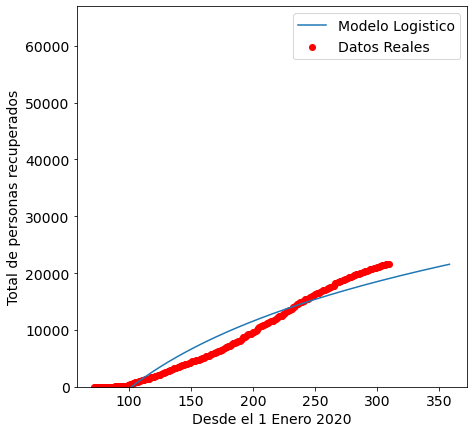

In [149]:
pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas recuperados")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

### Grafica Infectados

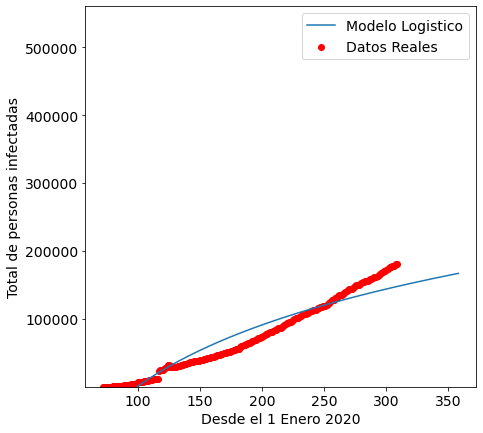

In [148]:
pred_x1 = list(range(min(x1),max(x1)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x1,y1,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x1, [modelo_logistico(i,exp_fit1[0][0],exp_fit1[0][1]) for i in pred_x1], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y1)*0.9,max(y1)*3.1)) # Definir los limites de Y
plt.show()

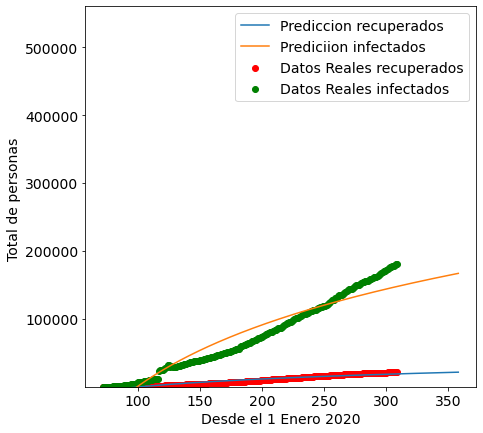

In [176]:
pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales recuperados",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Prediccion recuperados" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas ")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y

pred_x1 = list(range(min(x1),max(x1)+50)) # Predecir dias
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x1,y1,label="Datos Reales infectados",color="Green")
# Predicted exponential curve
plt.plot(pred_x1, [modelo_logistico(i,exp_fit1[0][0],exp_fit1[0][1]) for i in pred_x1], label="Prediciion infectados" )
plt.legend()
plt.ylim((min(y1)*0.9,max(y1)*3.1)) # Definir los limites de Y
plt.show()

# Modelo exponencial

[0.02009891 6.73559575]


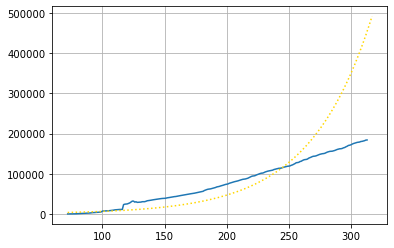

In [30]:
curve_fit = np.polyfit(x1,np.log(y1),deg=1)
print(curve_fit)
pred_x = np.array(list(range(min(x1),max(x1)+5)))
yx = np.exp(curve_fit[1])* np.exp(curve_fit[0]*pred_x)
plt.plot(x,y,"-")
plt.plot(pred_x,yx,color="gold",linestyle=':')
plt.grid(True)

# Modelo polinomial

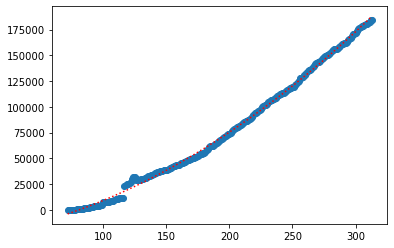

RMSE: 2639.350217859606
R2: 0.9977878995767883


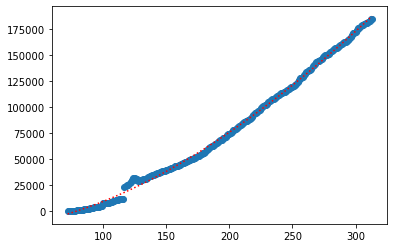

RMSE: 2610.906774806989
R2: 0.997835320884388


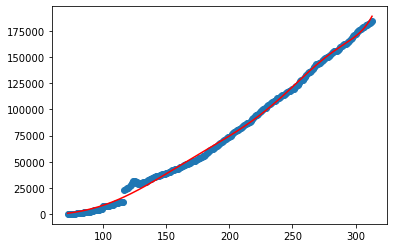

RMSE: 2894.009237590828
R2: 0.9973404349144549


In [35]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

x = df1.iloc [:, 0].values.reshape(-1, 1) # necesitamos un array de 2D para SkLearn
y = df1.iloc [:, 1].values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#función polinomial de orden 2    
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r',linestyle=':')
plt.show()
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

#función polinomial de orden 3
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x)
     
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
     
plt.scatter(x, y)
plt.plot(x, y_pred, color='r',linestyle=':')
plt.show()
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

#función polinomial de orden 10
poly = PolynomialFeatures(degree=10, include_bias=False)
x_poly = poly.fit_transform(x)
     
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
     
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()
     
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

## Analisis
lo que se puede sacar del analisis de los datatos es que existe un  gran desface entre el numero de infectados y el numero de recuperados
## Conclusiones
segun cada modelo se puede concluir que cada modelo puede ajustarse mejor a cada dato ,depediendo de la informacion que se tenga en el caso del modelo polinomico se puede obserbar que exite un mayor ajuste en la curba cuando es de grado 10
## Criterio personal (politico, economico y  social de la situacion)
lo que se puede concluir es que el indise de recuperados es menor al indise de infectados lo cual causa que el numero de infeectados aumente y aga que los hospitales colapse

# Referencias

- https://github.com/andrab/ecuacovid/tree/master/datos_crudos

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

- https://python-para-impacientes.blogspot.com/2014/08/graficos-en-ipython.html

- https://www.ellaberintodefalken.com/2019/12/regresion-polinomica-polinomial.html